In [52]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, f1_score
from utils import expected_calibration_error, permutation_test_ause
from bayesian_model import GPSparseBayesModel
import seaborn as sns

Diabetes

In [21]:
diabetes_df = pd.read_csv("data/diabetes.csv")

diabetes_ood = diabetes_df.loc[diabetes_df['Age']>45]
diabetes_id = diabetes_df.loc[diabetes_df['Age']<=45]

X_train, y_train = diabetes_id[["Pregnancies", "Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age"]], diabetes_id[['Outcome']]
X_test, y_test = diabetes_ood[["Pregnancies", "Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age"]], diabetes_ood[['Outcome']]

X_train, X_test = np.array(X_train), np.array(X_test)
y_train, y_test = np.array(y_train).ravel(), np.array(y_test).ravel()

Accuracy: 0.5932203389830508 F1 Score: 0.6521739130434782


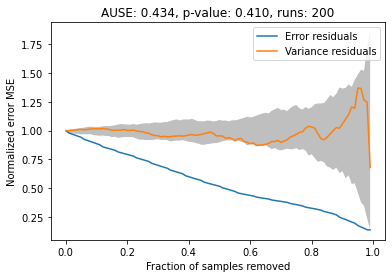

In [24]:
kernel = 'rbf'
loss = 'trace_meanfield_elbo'
induced_points_method = 'random'

model = GPSparseBayesModel(**{"random_seed": 7200, 
                              "num_induced_samples": 'sqrt', 
                              "kernel": kernel,
                              "loss": loss,
                              "induced_points_method": induced_points_method
                            })
model.after_setup()
model.train(X_train, y_train)
pred_probs, pred_vars, pred_labels = model.test(X_test, None)
print("Accuracy:", accuracy_score(y_test, pred_labels), "F1 Score:", f1_score(y_test, pred_labels))
permutation_test_ause(pred_probs, pred_vars, y_test)

Accuracy: 0.5932203389830508 F1 Score: 0.6521739130434782


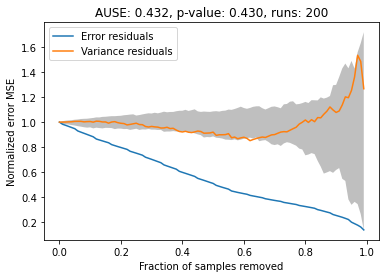

In [27]:
kernel = 'rbf'
loss = 'trace_meanfield_elbo'
induced_points_method = 'random'

model = GPSparseBayesModel(**{"random_seed": 7200, 
                              "num_induced_samples": 100, 
                              "kernel": kernel,
                              "loss": loss,
                              "induced_points_method": induced_points_method
                            })
model.after_setup()
model.train(X_train, y_train)
pred_probs, pred_vars, pred_labels = model.test(X_test, None)
print("Accuracy:", accuracy_score(y_test, pred_labels), "F1 Score:", f1_score(y_test, pred_labels))
permutation_test_ause(pred_probs, pred_vars, y_test)

Red wine

In [29]:
1599*0.2

319.8

In [63]:
r_wine = pd.read_csv('data/winequality-red.csv', sep=";")
r_wine_s = r_wine.sort_values(by='quality')

r_wine_ood = r_wine_s[800:1000]
r_wine_id = r_wine_s.drop(range(800,1000,1))

r_wine_id['label'] = r_wine_id['quality'] > 5
r_wine_id['label'] = r_wine_id['label'].astype(int)

r_wine_ood['label'] = r_wine_ood['quality'] > 5
r_wine_ood['label'] = r_wine_ood['label'].astype(int)

C:\Users\divya\anaconda3\envs\venv\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\divya\anaconda3\envs\venv\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [64]:
X_train, y_train = r_wine_id[r_wine_id.columns[:-2]], r_wine_id['label']
X_test, y_test = r_wine_ood[r_wine_ood.columns[:-2]], r_wine_ood['label']
X_train, X_test = np.array(X_train), np.array(X_test)
y_train, y_test = np.array(y_train).ravel(), np.array(y_test).ravel()

Accuracy: 0.775 F1 Score: 0.8732394366197184


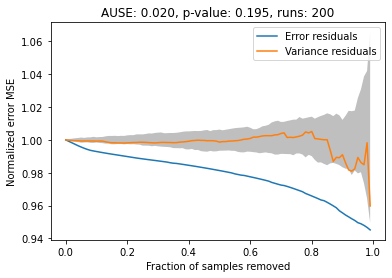

In [65]:
kernel = 'poly'
loss = 'trace_meanfield_elbo'
induced_points_method = 'random'

model = GPSparseBayesModel(**{"random_seed": 7200, 
                              "num_induced_samples": 'sqrt', 
                              "kernel": kernel,
                              "loss": loss,
                              "induced_points_method": induced_points_method
                            })
model.after_setup()
model.train(X_train, y_train)
pred_probs, pred_vars, pred_labels = model.test(X_test, None)
print("Accuracy:", accuracy_score(y_test, pred_labels), "F1 Score:", f1_score(y_test, pred_labels))
permutation_test_ause(pred_probs, pred_vars, y_test)

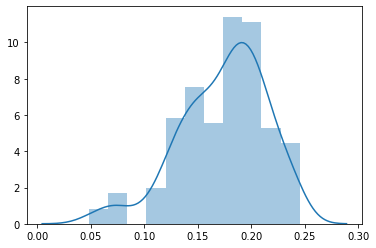

In [66]:
sns.distplot(pred_vars)

White wine

In [87]:
w_wine = pd.read_csv('data/winequality-white.csv', sep=";")
w_wine_s = w_wine.sort_values(by='alcohol')

w_wine_ood = w_wine_s[2000:2400]
w_wine_id = w_wine_s.drop(range(2000,2400,1))

w_wine_id['label'] = w_wine_id['quality'] > 5
w_wine_id['label'] = w_wine_id['label'].astype(int)

w_wine_ood['label'] = w_wine_ood['quality'] > 5
w_wine_ood['label'] = w_wine_ood['label'].astype(int)

X_train, y_train = w_wine_id[w_wine_id.columns[:-2]], w_wine_id['label']
X_test, y_test = w_wine_ood[w_wine_ood.columns[:-2]], w_wine_ood['label']
X_train, X_test = np.array(X_train), np.array(X_test)
y_train, y_test = np.array(y_train).ravel(), np.array(y_test).ravel()

C:\Users\divya\anaconda3\envs\venv\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\divya\anaconda3\envs\venv\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


Accuracy: 0.6725 F1 Score: 0.7697715289982426


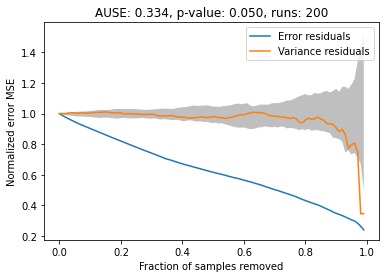

In [88]:
kernel = 'rbf'
loss = 'trace_meanfield_elbo'
induced_points_method = 'kmeans'

model = GPSparseBayesModel(**{"random_seed": 7200, 
                              "num_induced_samples": 'sqrt', 
                              "kernel": kernel,
                              "loss": loss,
                              "induced_points_method": induced_points_method
                            })
model.after_setup()
model.train(X_train, y_train)
pred_probs, pred_vars, pred_labels = model.test(X_test, None)
print("Accuracy:", accuracy_score(y_test, pred_labels), "F1 Score:", f1_score(y_test, pred_labels))
permutation_test_ause(pred_probs, pred_vars, y_test)

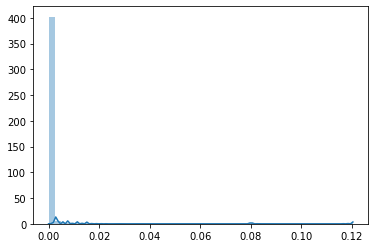

In [89]:
sns.distplot(pred_vars)